# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [14]:
df1 = pd.DataFrame()
df1["reviews"] = reviews
df1.head()

,reviews
0,"✅ Trip Verified | The seats were excellent, ..."
1,✅ Trip Verified | After the nightmare of get...
2,✅ Trip Verified | Prior to boarding a gate a...
3,✅ Trip Verified | I flew from Amsterdam to L...
4,"✅ Trip Verified | First the good news, the clu..."


In [6]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Base URL for British Airways reviews
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/"

# List to store reviews
reviews_list = []

# Number of pages to scrape
max_pages = 10

# Start scraping from page 1 to max_pages
for page in range(1, max_pages + 1):
    url = f"{base_url}{page}/"
    headers = {"User-Agent": "Mozilla/5.0"}

    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to retrieve page {page}, stopping.")
        break

    soup = BeautifulSoup(response.text, "html.parser")

    # Extract all review containers
    reviews = soup.find_all("div", class_="text_content")

    # If no reviews found, exit loop (end of pages)
    if not reviews:
        print("No more reviews found, stopping.")
        break

    # Extract review text and append to list
    for review in reviews:
        reviews_list.append(review.text.strip())

    print(f"Scraped page {page}")

    # Delay to avoid being blocked
    time.sleep(2)

# Convert to DataFrame
df = pd.DataFrame(reviews_list, columns=["Review"])


Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10


In [40]:
df.head()

,Review
0,"✅ Trip Verified | The seats were excellent, ..."
1,✅ Trip Verified | After the nightmare of get...
2,✅ Trip Verified | Prior to boarding a gate a...
3,✅ Trip Verified | I flew from Amsterdam to L...
4,"✅ Trip Verified | First the good news, the clu..."


In [42]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
df = pd.read_csv("british_airways_reviews.csv")

# Download required NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply text cleaning
df["Cleaned_Review"] = df["Review"].astype(str).apply(clean_text)

# Save cleaned data
df.to_csv("cleaned_british_airways_reviews.csv", index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
print(df['Cleaned_Review'])

0       trip verified seat excellent feel much room of...
1       trip verified nightmare getting triple securit...
2       trip verified prior boarding gate agent seemed...
3       trip verified flew amsterdam la vega layover h...
4       trip verified first good news club suite huge ...
                              ...                        
3914    flew lhr vie return operated bmi ba aircraft a...
3915    lhr ham purser address club passenger name boa...
3916    son worked british airway urged fly british ai...
3917    london city new york jfk via shannon a318 real...
3918    sin lhr ba12 b747 436 first class old aircraft...
Name: Cleaned_Review, Length: 3919, dtype: object


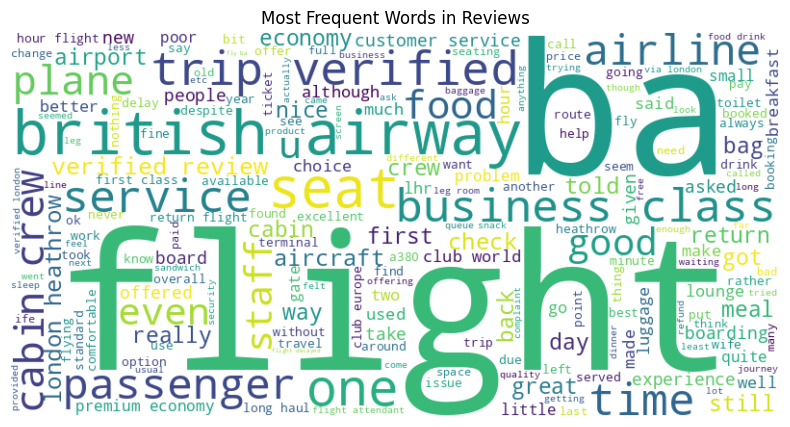

In [44]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["Cleaned_Review"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()

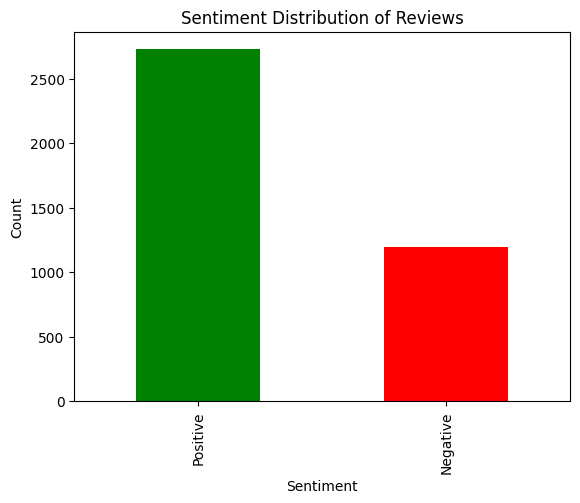

In [45]:
def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score <= 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Cleaned_Review"].apply(get_sentiment)

# Sentiment Distribution
df["Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "blue"])
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


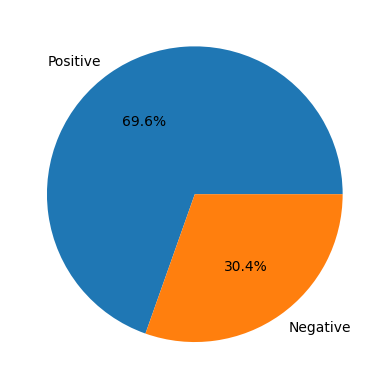

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df["Sentiment"].value_counts()
data = sentiment_counts.values
palette_color = sns.color_palette()
plt.pie(data, labels=sentiment_counts.index, colors=palette_color, autopct="%.1f%%")
plt.show()

In [48]:
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df["Cleaned_Review"])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Display Topics
for i, topic in enumerate(lda_model.components_):
    words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {', '.join(words)}")


Topic 1: food, flight, british, airway, service, airline, seat, business, class, ba
Topic 2: london, verified, day, told, airway, british, customer, hour, ba, flight
Topic 3: lhr, lounge, club, cabin, ba, food, crew, flight, good, seat
Topic 4: london, time, cabin, service, meal, ba, food, economy, seat, flight
Topic 5: boarding, hour, passenger, verified, check, crew, staff, time, ba, flight
